## <font style="color:rgb(50,120,229)">Exercise</font>

1. [Easy] Can you change the code slightly so the you can partially see the eyes?
2. [Medium] Use the same logic, can you create a similar filter which can augment other objects like ear-rings, mustache etc? Try it out.
3. [Hard] You can also try to come up with algorithms to automatically detect the region using computer vision techniques instead of checking the eye region manually.


## <font style="color:rgb(50,120,229)">Necessary libs</font>

In [2]:
# load necessary Libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)          # .rcParams['figure.figsize'] is a tuple of the default figure size in inches
matplotlib.rcParams['image.cmap'] = 'gray'                  # .rcParams['image.cmap'] is the default colormap for images
matplotlib.rcParams['image.interpolation'] = 'bilinear'     # .rcParams is a dictionary-like variable that stores matplotlib's default configuration
                                                            # .rcParams['image.interpolation'] is the default interpolation method for images

## <font style="color:rgb(50,120,229)">Load & Show the Images</font>

Image Shape:  (500, 600, 3)


Text(0.5, 1.0, 'Original Image')

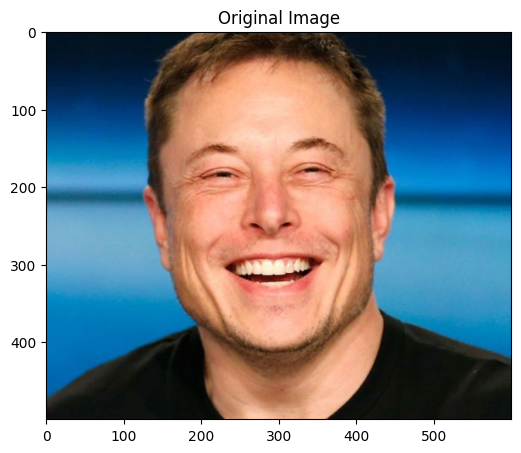

In [4]:
# Load the face Image
path = DATA_PATH + "/images/musk.jpg"
image = cv2.imread(path)              # Read the image
image = np.float32(image)/255.0          # Convert to float32 and scale to [0,1] from 8-bit image

print("Image Shape: ",image.shape)

plt.imshow(image[:,:,::-1]); plt.title("Original Image")      # Display the image [:,:,::-1] means [all rows, all columns, reverse the color channels]  - BGR to RGB 



image Dimension = (273, 627, 4)
image Dimension = (136, 314, 4)


Text(0.5, 1.0, 'Alpha channel')

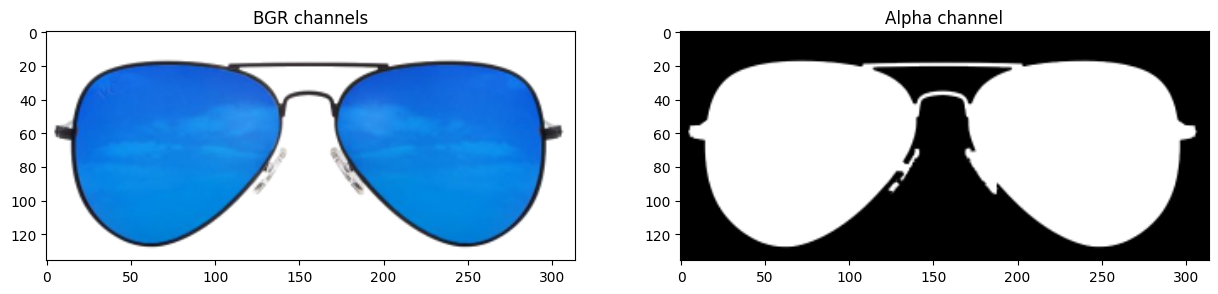

In [5]:
# Load the sunglasses Image with Alpha channel
path = DATA_PATH + "/images/sunglass.png"
sunglasses = cv2.imread(path, -1)              # Read the image
sunglasses1 = np.float32(sunglasses)/255.0          # Convert to float32 and scale to [0,1] from 8-bit image

print("image Dimension = {}".format(sunglasses.shape))

# figured-out if downscale the image by 50%, to fit the face
scaledown = 0.5
sunglasses1 = cv2.resize(sunglasses1, (0,0), fx=scaledown, fy=scaledown)  # resize the image
print("image Dimension = {}".format(sunglasses1.shape))

# split the image in BGr & Alpha channels
sg_bgr = sunglasses1[:,:,0:3]       # BGR channels
sg_alpha = sunglasses1[:,:,3]       # Alpha channel

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(sg_bgr[:,:,::-1]); plt.title("BGR channels")
plt.subplot(122); plt.imshow(sg_alpha, cmap='gray'); plt.title("Alpha channel")

image Dimension = (720, 1280, 4)
image Dimension = (72, 128, 4)


Text(0.5, 1.0, 'Alpha channel')

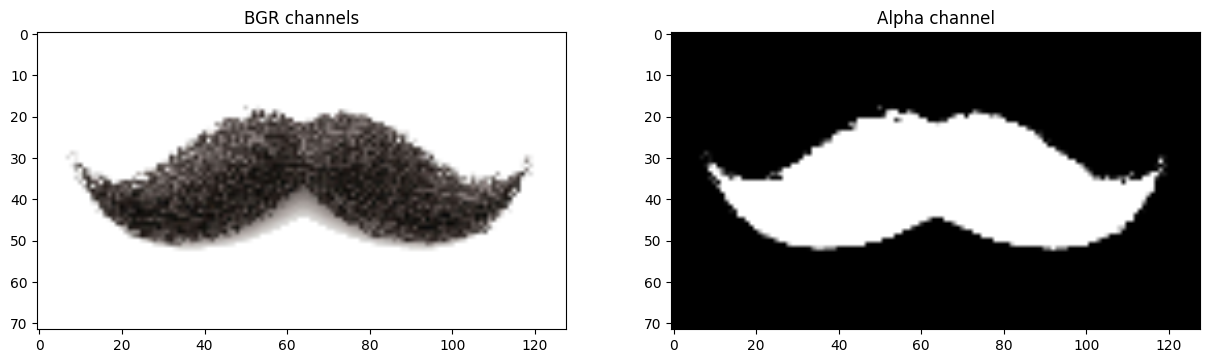

In [6]:
# load moustache image
path = DATA_PATH + "/images/moustache.png"
mst = cv2.imread(path, -1)              # Read the image
mst1 = np.float32(mst)/255.0          # Convert to float32 and scale to [0,1] from 8-bit image

print("image Dimension = {}".format(mst.shape))

# figured-out if downscale the image by 10%, to fit the face
scaledown = 0.1
mst1 = cv2.resize(mst1, (0,0), fx=scaledown, fy=scaledown)  # resize the image
print("image Dimension = {}".format(mst1.shape))

# split the image in BGr & Alpha channels
mst_bgr = mst1[:,:,0:3]       # BGR channels
mst_alpha = mst1[:,:,3]       # Alpha channel

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(mst_bgr[:,:,::-1]); plt.title("BGR channels")
plt.subplot(122); plt.imshow(mst_alpha, cmap='gray'); plt.title("Alpha channel")


image Dimension = (988, 1711, 4)
image Dimension = (99, 342, 4)


Text(0.5, 1.0, 'Alpha channel')

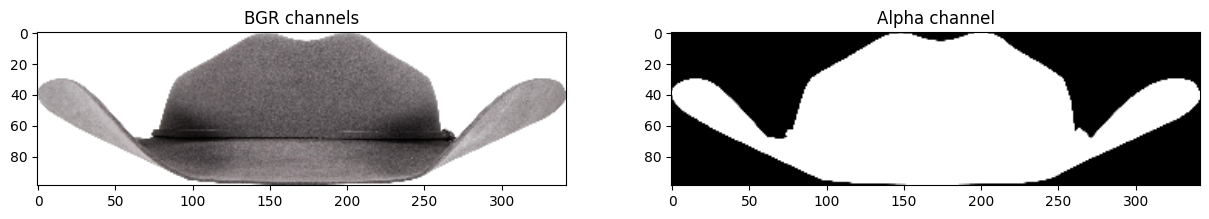

In [7]:
# load the hat image
path = DATA_PATH + "/images/hat.png"
hat = cv2.imread(path, -1)              # Read the image
hat1 = np.float32(hat)/255.0          # Convert to float32 and scale to [0,1] from 8-bit image

print("image Dimension = {}".format(hat.shape))

# figured-out if downscale the image by 20%, to fit the face
scaledown_x = 0.2
scaledown_y = 0.1
hat1 = cv2.resize(hat1, (0,0), fx=scaledown_x, fy=scaledown_y)  # resize the image
print("image Dimension = {}".format(hat1.shape))

# split the image in BGr & Alpha channels
hat_bgr = hat1[:,:,0:3]       # BGR channels
hat_alpha = hat1[:,:,3]       # Alpha channel

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(hat_bgr[:,:,::-1]); plt.title("BGR channels")
plt.subplot(122); plt.imshow(hat_alpha, cmap='gray'); plt.title("Alpha channel")


## <font style="color:rgb(50,120,229)">Naive Replace</font>

In [8]:
# Make a copy of an image
face_naive = image.copy()

### <font style="color:rgb(8,133,37)">Glasses</font>

In [9]:
# Set the approx pixel position for Glasses
top_left_row_sg = 130
top_left_col_sg = 130

bottom_right_row_sg = top_left_row_sg+ sg_bgr.shape[0]
bottom_right_col_sg = top_left_col_sg + sg_bgr.shape[1]

top_left_row_sg, top_left_col_sg, bottom_right_row_sg, bottom_right_col_sg

(130, 130, 266, 444)

Text(0.5, 1.0, 'Sunglasses - Naive Approach')

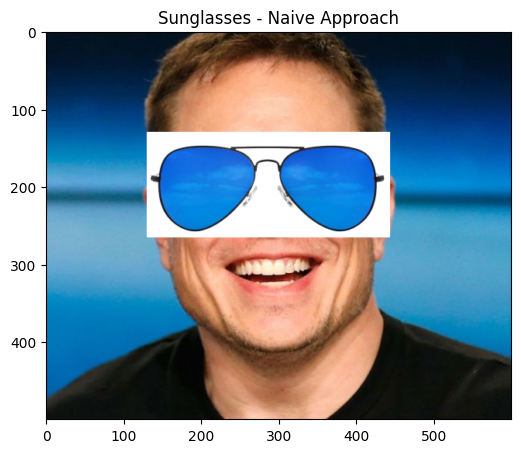

In [10]:
# Replace eye region with sunglasses
face_naive[top_left_row_sg:bottom_right_row_sg, top_left_col_sg:bottom_right_col_sg] = sg_bgr       # replace the region with the sunglasses image (BGR channels)
plt.imshow(face_naive[:,:,::-1]); plt.title("Sunglasses - Naive Approach")

### <font style="color:rgb(8,133,37)">Moustache</font>

In [11]:
# set the approx pixel position for Moustache
top_left_row_m = 239
top_left_col_m = 230

bottom_right_row_m = top_left_row_m+ mst_bgr.shape[0]
bottom_right_col_m = top_left_col_m + mst_bgr.shape[1]

top_left_row_m, top_left_col_m, bottom_right_row_m, bottom_right_col_m

(239, 230, 311, 358)

Text(0.5, 1.0, 'Moustache - Naive Approach')

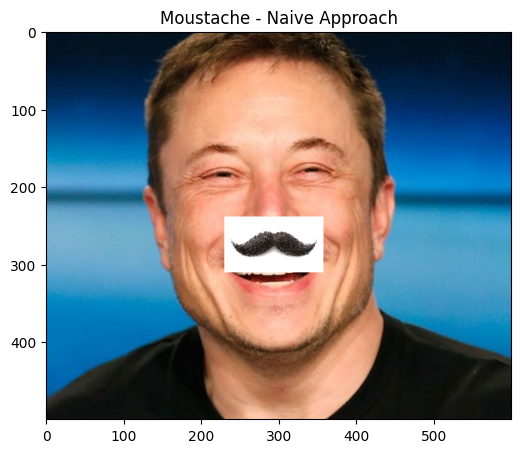

In [12]:
# Make a copy of an image
face_naive_m = image.copy()
# Replace the upper lip region with moustache
face_naive_m[top_left_row_m:bottom_right_row_m, top_left_col_m:bottom_right_col_m] = mst_bgr       # replace the region with the moustache image (BGR channels)
plt.imshow(face_naive_m[:,:,::-1]); plt.title("Moustache - Naive Approach")

### <font style="color:rgb(8,133,37)">Hat</font>

In [13]:
# set the approx pixel position for Hat
top_left_row_h = 0
top_left_col_h = 120

bottom_right_row_h = top_left_row_h+ hat_bgr.shape[0]
bottom_right_col_h = top_left_col_h + hat_bgr.shape[1]

top_left_row_h, top_left_col_h, bottom_right_row_h, bottom_right_col_h

(0, 120, 99, 462)

Text(0.5, 1.0, 'Hat - Naive Approach')

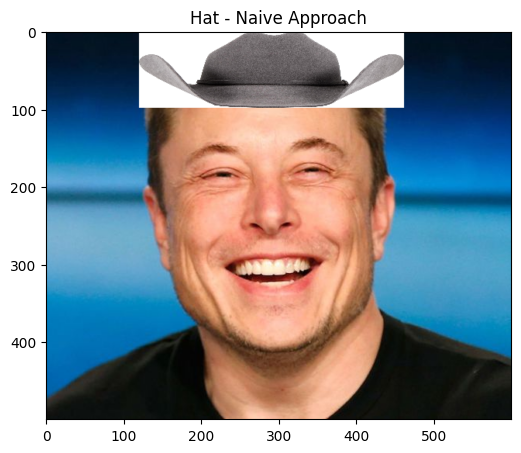

In [14]:
face_naive_h = image.copy()

# Replace the forehead region with hat
face_naive_h[top_left_row_h:bottom_right_row_h, top_left_col_h:bottom_right_col_h] = hat_bgr       # replace the region with the hat image (BGR channels)
plt.imshow(face_naive_h[:,:,::-1]); plt.title("Hat - Naive Approach")

## <font style="color:rgb(50,120,229)">Arithmetic Operations & Alpha Mask (better approach than Naive)</font>

1. Create an Alpha Mask with no of Channels as in original image (musk.jpg has 3) using a single channel Mask
2. Extrack the ROI from the image (Glass: eye region, Moustache: mouth region, Hat: forehead region)
3. Multiply the ROI with the Alpha Mask
4. multiply the negative of the Alpha Mask with the background, to get the background region
5. Add the two images to get the final output
6. Replace the ROI in the original image with the output image

### <font style="color:rgb(8,133,37)">Sunglasses</font>

In [15]:
sg_alpha.shape   # Alpha channel is 2D - 2D array

(136, 314)

In [16]:
# Creating a 3-Channels Alpha mask
sg_alpha3 = cv2.merge((sg_alpha*0.75, sg_alpha*0.75, sg_alpha*0.75))  # Create a 3-channel alpha mask & adjust the transparency of the sunglasses by reducing the alpha value of the pixels.
sg_alpha3.shape


(136, 314, 3)

Text(0.5, 1.0, 'Final Eye Region')

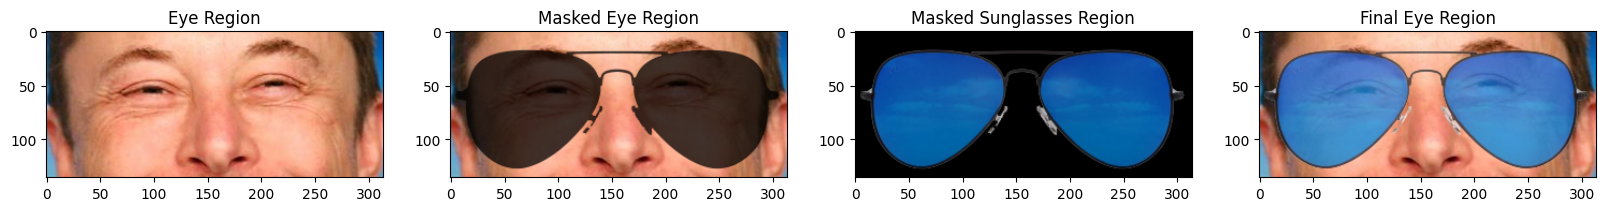

In [17]:
# Make a copy of an image
face_arithmetic_sg = image.copy()

# Extract the region of interest
eye_roi = face_arithmetic_sg[top_left_row_sg:bottom_right_row_sg, top_left_col_sg:bottom_right_col_sg]

# use the Mask to create the masked region
eye_roi_masked = cv2.multiply(eye_roi, (1 - sg_alpha3))  # where all the glassmask was white goes to zero, everywhere else is face image

# use maks to create the masked sunglasses region
sg_masked = cv2.multiply(sg_bgr, sg_alpha3)  # multiply the sunglasses BGr image with sunglasses 3Channel alpha image - give sunglasses region & rest is black

# add the masked sunglasses & masked eye regions
eye_roi_final = cv2.add(eye_roi_masked, sg_masked)   # add the masked sunglasses & masked eye regions

# Display the final output
plt.figure(figsize = [20,20])
plt.subplot(141); plt.imshow(eye_roi[:,:,::-1]); plt.title("Eye Region")
plt.subplot(142); plt.imshow(eye_roi_masked[:,:,::-1]); plt.title("Masked Eye Region")
plt.subplot(143); plt.imshow(sg_masked[:,:,::-1]); plt.title("Masked Sunglasses Region")
plt.subplot(144); plt.imshow(eye_roi_final[:,:,::-1]); plt.title("Final Eye Region") 

Text(0.5, 1.0, 'Sunglasses - Naive Approach')

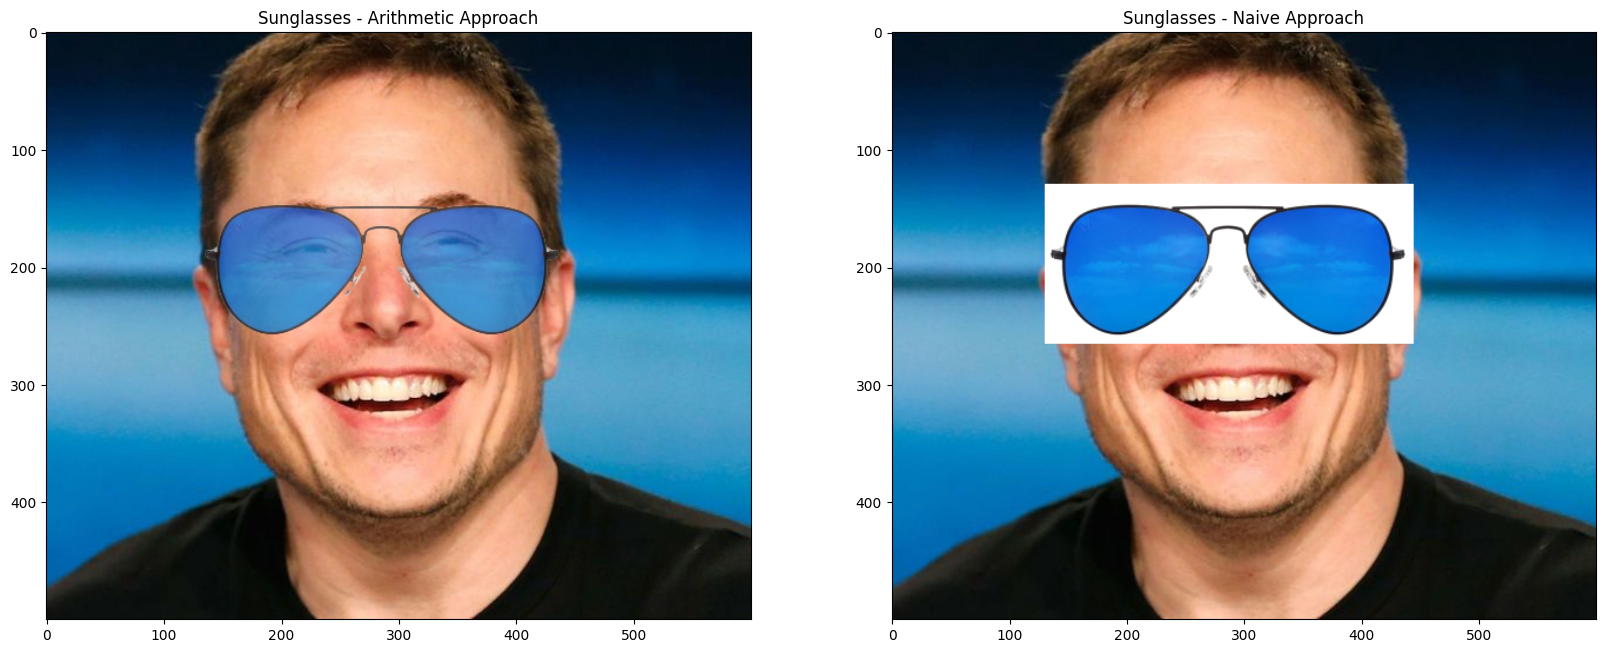

In [18]:
# Replace the eye region with the final output
face_arithmetic_sg[top_left_row_sg:bottom_right_row_sg, top_left_col_sg:bottom_right_col_sg] = eye_roi_final

# Display the final output
plt.figure(figsize = [20,20])
plt.subplot(121); plt.imshow(face_arithmetic_sg[:,:,::-1]); plt.title("Sunglasses - Arithmetic Approach")
plt.subplot(122); plt.imshow(face_naive[:,:,::-1]); plt.title("Sunglasses - Naive Approach")


### <font style="color:rgb(8,133,37)">Gunglasses (Bitwise Operation)</font>

Much faster than Arithmetic operations but with a slight poor quality

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sunglasses - Naive Approach')

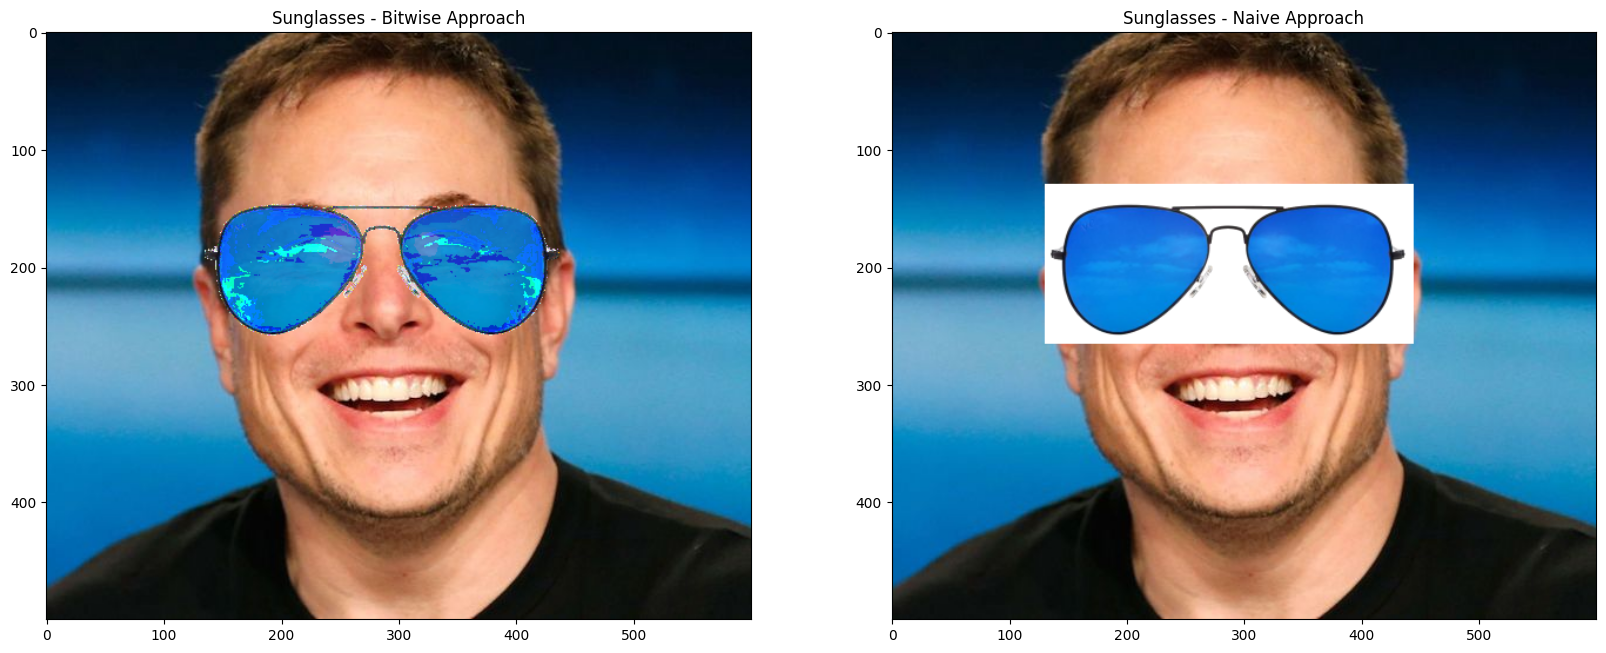

In [19]:
# make a copy of the image
face_bit_sg = image.copy()

# Extract the region of interest
eye_roi = face_arithmetic_sg[top_left_row_sg:bottom_right_row_sg, top_left_col_sg:bottom_right_col_sg]

# Create a mask for the sunglasses
eye = cv2.bitwise_and(eye_roi, cv2.bitwise_not(sg_alpha3))  # bitwise and of eye region & bitwise not of sunglasses alpha mask

# Create a mask for the face
sunglasses = cv2.bitwise_and(sg_bgr, sg_alpha3)  # bitwise and of sunglasses BGR image & sunglasses alpha mask

# Add the masks to get the final output
eye_roi_final = cv2.bitwise_or(eye, sunglasses)  # bitwise or of eye region & sunglasses


# Replace the eye region with the final output
face_bit_sg[top_left_row_sg:bottom_right_row_sg, top_left_col_sg:bottom_right_col_sg] = eye_roi_final

# Display the final output
plt.figure(figsize = [20,20])
plt.subplot(121); plt.imshow(face_bit_sg[:,:,::-1]); plt.title("Sunglasses - Bitwise Approach")
plt.subplot(122); plt.imshow(face_naive[:,:,::-1]); plt.title("Sunglasses - Naive Approach")


### <font style="color:rgb(8,133,37)">Moustache</font>

1. Create an Alpha Mask with no of Channels as in original image (musk.jpg has 3) using a single channel Mask



In [20]:
# creating an alpha mask with 3 channels
must_alpha3 = cv2.merge((mst_alpha*0.8, mst_alpha*0.8, mst_alpha*0.8)) # with reduced transparency upto 80%

# Make a copy of an image
face_arithmetic_m = face_arithmetic_sg.copy()

2. Extrack the ROI from the image (Glass: eye region, Moustache: mouth region, Hat: forehead region)

In [21]:
mst_roi = face_arithmetic_m[top_left_row_m:bottom_right_row_m, top_left_col_m:bottom_right_col_m]

3. Multiply the ROI with the Alpha Mask


In [22]:
mst_roi_masked = cv2.multiply(mst_roi, (1 - must_alpha3))  # where all the moustachemask was white goes to zero, everywhere else is face image

4. Multiply the negative of mask with the background, to get the background region

In [23]:
mst_masked = cv2.multiply(mst_bgr, must_alpha3)  # multiply the moustache BGr image with moustache 3Channel alpha image - give moustache region & rest is black

5. Add the masked moustache & masked face regions

In [24]:
mst_roi_final = cv2.add(mst_roi_masked, mst_masked)   # add the masked moustache & masked upper lip regions

6. Replace the ROI in the original image with the output image

In [25]:
face_arithmetic_m[top_left_row_m:bottom_right_row_m, top_left_col_m:bottom_right_col_m] = mst_roi_final

Text(0.5, 1.0, 'Moustache - Naive Approach')

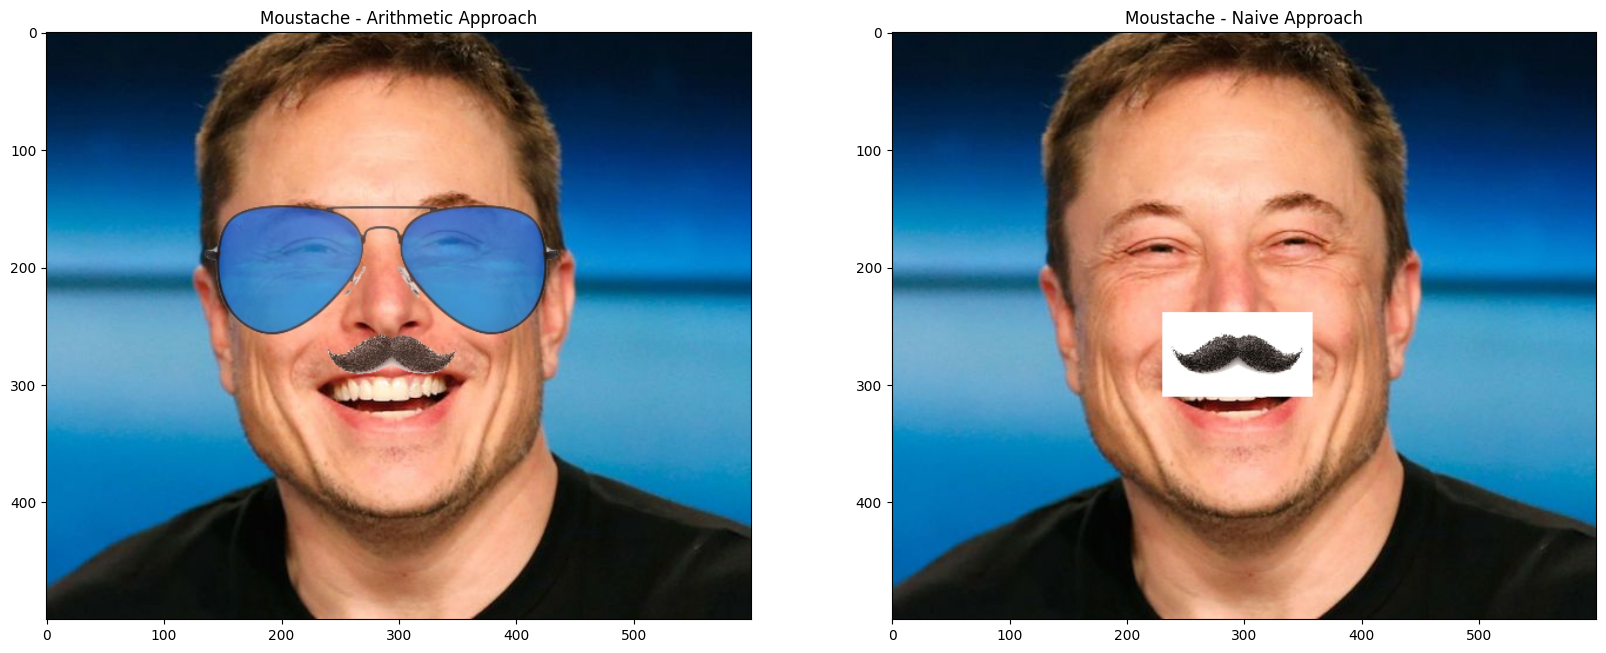

In [26]:
# Display the final output
plt.figure(figsize = [20,20])
plt.subplot(121); plt.imshow(face_arithmetic_m[:,:,::-1]); plt.title("Moustache - Arithmetic Approach")
plt.subplot(122); plt.imshow(face_naive_m[:,:,::-1]); plt.title("Moustache - Naive Approach")


### <font style="color:rgb(8,133,37)">Hat</font>

In [27]:
# Make a copy of an image
face_arithmetic_h = face_arithmetic_m.copy()

1. Create an Alpha Mask with no of Channels as in original image (musk.jpg has 3) using a single channel Mask



In [28]:
hat_alpha3 = cv2.merge((hat_alpha*0.8, hat_alpha*0.8, hat_alpha*0.8)) # with reduced transparency upto 80%

2. Extrack the ROI from the image (Glass: eye region, Moustache: mouth region, Hat: forehead region)

In [29]:
hat_roi = face_arithmetic_h[top_left_row_h:bottom_right_row_h, top_left_col_h:bottom_right_col_h]

3. Multiply the ROI with the Alpha Mask


In [30]:
hat_roi_masked = cv2.multiply(hat_roi, (1 - hat_alpha3))  # where all the hatmask was white goes to zero, everywhere else is face image

4. Multiply the negative of mask with the background, to get the background region

In [31]:
hat_masked = cv2.multiply(hat_bgr, hat_alpha3)  # multiply the hat BGr image with hat 3Channel alpha image - give hat region & rest is black

5. Add the masked moustache & masked face regions

In [32]:
hat_roi_final = cv2.add(hat_roi_masked, hat_masked)   # add the masked hat & masked forehead regions

6. Replace the ROI in the original image with the output image

In [33]:
face_arithmetic_h[top_left_row_h:bottom_right_row_h, top_left_col_h:bottom_right_col_h] = hat_roi_final

Text(0.5, 1.0, 'Hat - Naive Approach')

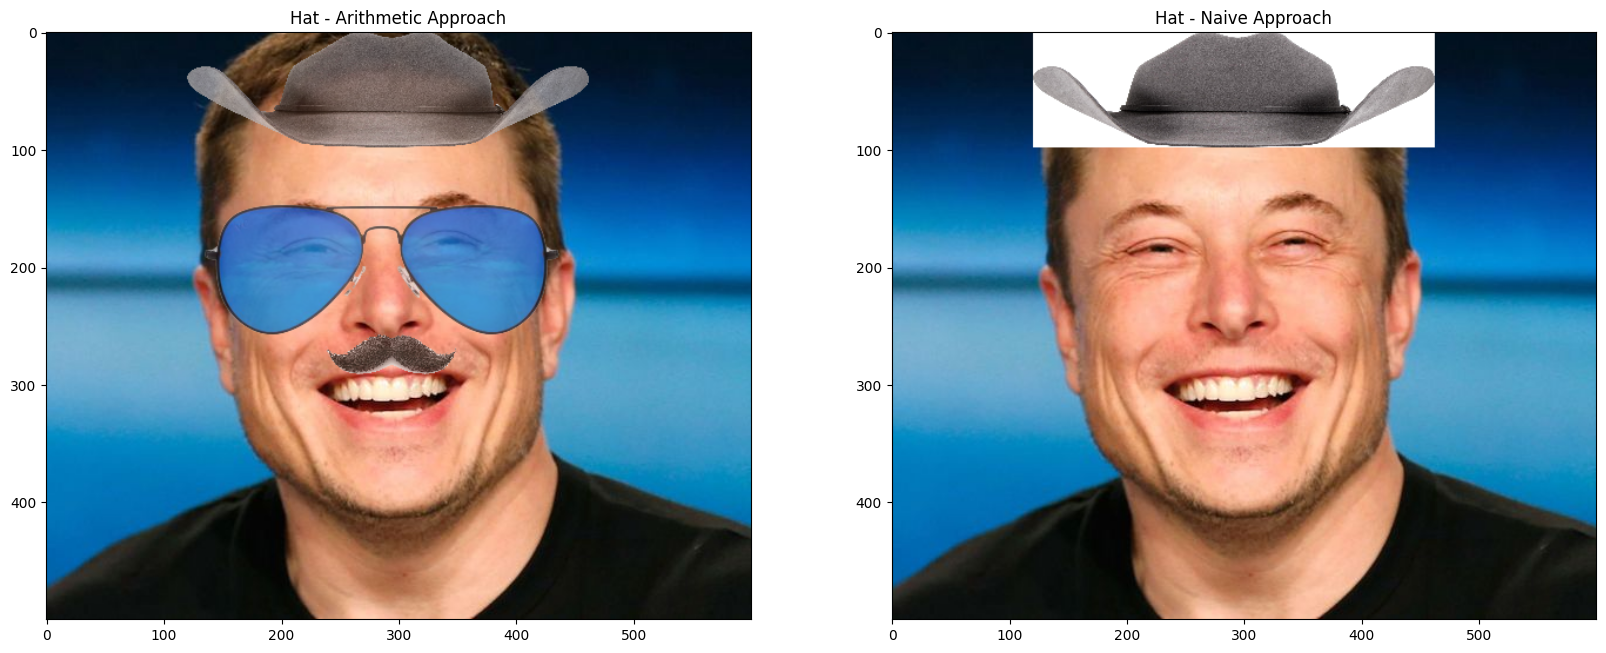

In [34]:
# Display the final output
plt.figure(figsize = [20,20])
plt.subplot(121); plt.imshow(face_arithmetic_h[:,:,::-1]); plt.title("Hat - Arithmetic Approach")
plt.subplot(122); plt.imshow(face_naive_h[:,:,::-1]); plt.title("Hat - Naive Approach")